<a href="https://colab.research.google.com/github/Krisha-priya/data-science_tutorial/blob/main/SVM_nonlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Setosa vs not Setosa
y = np.where(y == 0, 1, -1)  # Setosa = 1, Others = -1

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM parameters
learning_rate = 0.001
lambda_param = 0.01
epochs = 1000

# Initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0

for epoch in range(epochs):
    for i in range(len(X_train)):
        condition = y_train[i] * (np.dot(X_train[i], w) + b) >= 1
        if condition:
            w -= learning_rate * (2 * lambda_param * w)
        else:
            w -= learning_rate * (2 * lambda_param * w - np.dot(X_train[i], y_train[i]))
            b -= learning_rate * y_train[i]

# Predicting...
def predict(X):
    return np.sign(np.dot(X, w) + b)

# Accuracy
y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)

print("Weights:", w)
print("Bias:", b)
print("Accuracy:", accuracy)

Weights: [-10.54427439  12.65842061 -16.60088793 -16.00529451]
Bias: 72.04599999997995
Accuracy: 0.36666666666666664


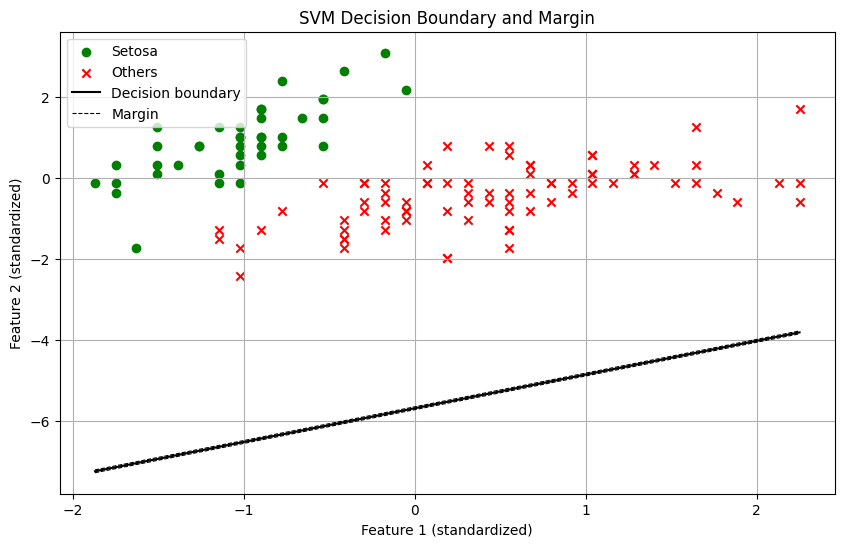

In [2]:
import matplotlib.pyplot as plt
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 6))

    # Scatter plot of classes
    for label, marker, color in zip([1, -1], ('o', 'x'), ('green', 'red')):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1],
                    marker=marker, color=color, label="Setosa" if label == 1 else "Others")

    # Decision boundary: w.x + b = 0 => x2 = -(w0*x1 + b)/w1
    x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x1 = -(w[0] * x0 + b) / w[1]
    margin = 1 / np.linalg.norm(w)

    # Margins
    x1_margin_up = x1 + margin
    x1_margin_down = x1 - margin

    plt.plot(x0, x1, "k-", label="Decision boundary")
    plt.plot(x0, x1_margin_up, "k--", linewidth=0.8, label="Margin")
    plt.plot(x0, x1_margin_down, "k--", linewidth=0.8)

    plt.xlabel("Feature 1 (standardized)")
    plt.ylabel("Feature 2 (standardized)")
    plt.title("SVM Decision Boundary and Margin")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train, y_train, w, b)